In [1]:
import ROOT as R

Welcome to JupyROOT 6.24/00


In [2]:
data={
    'HPK-2E14_479':{
        'CH08':{0.8:'479_HPK_CH08_OV0.8_Tm40_run165',1.0:'479_HPK_CH08_OV1.0_Tm40_run166',1.2:'479_HPK_CH08_OV1.2_Tm40_run167'},
        'CH10':{0.8:'479_HPK_CH10_OV0.8_Tm40_run169',1.0:'479_HPK_CH10_OV1.0_Tm40_run170'},
    },
    'FBK-2E14_480':{
        'CH07':{0.8:'480_FBK_CH07_OV0.8_Tm40_run187',1.0:'480_FBK_CH07_OV1.0_Tm40_run188',1.2:'480_FBK_CH07_OV1.2_Tm40_run191'},
        'CH09':{0.8:'480_FBK_CH09_OV0.8_Tm40_run176',1.0:'480_FBK_CH09_OV1.0_Tm40_run177',1.2:'480_FBK_CH09_OV1.2_Tm40_run180_v2'},
    }
}

In [3]:
import pandas as pd

fitResults=[]

files={}
graphs={}
for array,array_data in data.items():
    for ch,ch_data in array_data.items():
        for ov,ov_data in ch_data.items():
            print(array,ch,ov,ov_data)
            files[ov_data]=R.TFile('results/fit_%s.root'%ov_data)
            graphs[ov_data]=files[ov_data].Get('fitResults')
            fitResults.append({'array':array,'ch':ch,'ov':ov,'scale':graphs[ov_data].GetPointY(1),'smear':graphs[ov_data].GetPointY(2)})

HPK-2E14_479 CH08 0.8 479_HPK_CH08_OV0.8_Tm40_run165
HPK-2E14_479 CH08 1.0 479_HPK_CH08_OV1.0_Tm40_run166
HPK-2E14_479 CH08 1.2 479_HPK_CH08_OV1.2_Tm40_run167
HPK-2E14_479 CH10 0.8 479_HPK_CH10_OV0.8_Tm40_run169
HPK-2E14_479 CH10 1.0 479_HPK_CH10_OV1.0_Tm40_run170
FBK-2E14_480 CH07 0.8 480_FBK_CH07_OV0.8_Tm40_run187
FBK-2E14_480 CH07 1.0 480_FBK_CH07_OV1.0_Tm40_run188
FBK-2E14_480 CH07 1.2 480_FBK_CH07_OV1.2_Tm40_run191
FBK-2E14_480 CH09 0.8 480_FBK_CH09_OV0.8_Tm40_run176
FBK-2E14_480 CH09 1.0 480_FBK_CH09_OV1.0_Tm40_run177
FBK-2E14_480 CH09 1.2 480_FBK_CH09_OV1.2_Tm40_run180_v2


In [4]:
#print(fitResults)

In [5]:
fitData=pd.DataFrame.from_records(fitResults)
print(fitData)

           array    ch   ov     scale       smear
0   HPK-2E14_479  CH08  0.8  0.840057  186.967442
1   HPK-2E14_479  CH08  1.0  0.832465  262.712618
2   HPK-2E14_479  CH08  1.2  0.773225  350.577590
3   HPK-2E14_479  CH10  0.8  0.817920  186.219027
4   HPK-2E14_479  CH10  1.0  0.801055  276.232992
5   FBK-2E14_480  CH07  0.8  0.970170  300.318634
6   FBK-2E14_480  CH07  1.0  0.967225  406.122895
7   FBK-2E14_480  CH07  1.2  0.890854  565.023436
8   FBK-2E14_480  CH09  0.8  0.925092  281.031662
9   FBK-2E14_480  CH09  1.0  0.942098  385.779015
10  FBK-2E14_480  CH09  1.2  0.895151  527.374737


In [6]:
ov_values=fitData['ov'].unique()
print(ov_values)

[0.8 1.  1.2]


In [17]:
for array in fitData['array'].unique():
    my_data=fitData[fitData['array']==array]
    graphs[array]={}
    for ch in my_data['ch'].unique():
        graphs[array][ch+'_scale']=R.TGraphErrors()
        graphs[array][ch+'_smear']=R.TGraphErrors()
        for i_ov,ov in enumerate(ov_values):
            if(len(my_data[(my_data['ch']==ch) & (my_data['ov']==ov)])>0):
                graphs[array][ch+'_scale'].SetPoint(i_ov,ov,my_data[(my_data['ch']==ch) & (my_data['ov']==ov)]['scale'])
                graphs[array][ch+'_smear'].SetPoint(i_ov,ov,my_data[(my_data['ch']==ch) & (my_data['ov']==ov)]['smear'])
        graphs[array][ch+'_scale'].SetName(array+'_'+ch+'_scale')
        graphs[array][ch+'_smear'].SetName(array+'_'+ch+'_smear')
        #graphs[array][ch+'_scale'].Print()
        
    graphs[array]['mean_scale']=R.TGraphErrors()
    graphs[array]['mean_smear']=R.TGraphErrors()
    for i_ov,ov in enumerate(ov_values):
        graphs[array]['mean_scale'].SetPoint(i_ov,ov,fitData[ (fitData['array']==array) & (fitData['ov']==ov) ]['scale'].mean())
        graphs[array]['mean_smear'].SetPoint(i_ov,ov,fitData[ (fitData['array']==array) & (fitData['ov']==ov) ]['smear'].mean())
    graphs[array]['mean_scale'].SetName(array+'_mean_scale')
    graphs[array]['mean_scale'].SetName(array+'_mean_smear')
    #graphs[array]['mean_scale'].Print()

In [8]:
c1=R.TCanvas('c1','c1',800,600)
t=R.TLatex()
t.SetTextSize(0.035)

l=R.TLegend(0.75,0.75,0.88,0.88)
l.SetTextSize(0.035)
l.SetFillColorAlpha(0,0)
l.SetBorderSize(0)

Info in <TCanvas::Print>: png file results/scale_HPK-2E14_479.png has been created
Info in <TCanvas::Print>: pdf file results/scale_HPK-2E14_479.pdf has been created
Info in <TCanvas::Print>: png file results/scale_FBK-2E14_480.png has been created
Info in <TCanvas::Print>: pdf file results/scale_FBK-2E14_480.pdf has been created
Info in <TCanvas::Print>: png file results/smear_HPK-2E14_479.png has been created
Info in <TCanvas::Print>: pdf file results/smear_HPK-2E14_479.pdf has been created
Info in <TCanvas::Print>: png file results/smear_FBK-2E14_480.png has been created
Info in <TCanvas::Print>: pdf file results/smear_FBK-2E14_480.pdf has been created


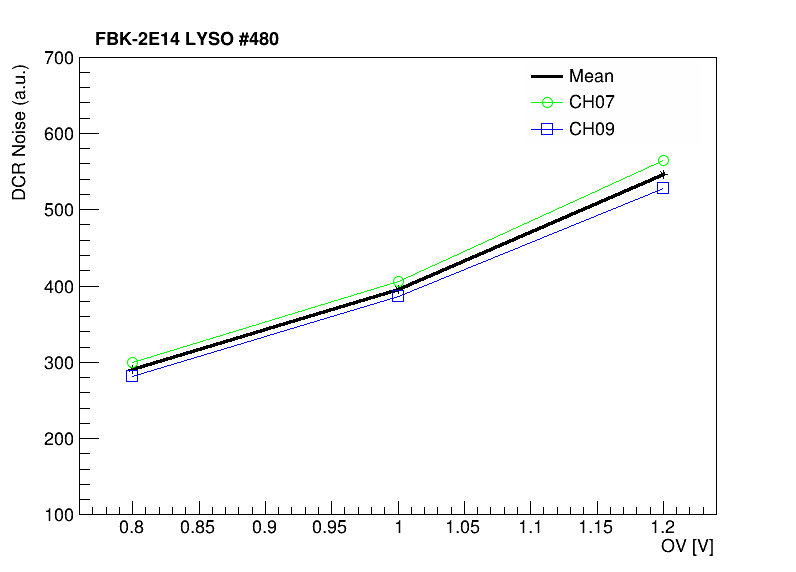

In [20]:
for par in ['scale','smear']:
    for array in fitData['array'].unique():
        l.Clear()
        graphs[array]['mean_%s'%par].SetLineWidth(3)
        l.AddEntry(graphs[array]['mean_%s'%par],'Mean','L')
        graphs[array]['mean_%s'%par].Draw('APL*')
        if (par=='scale'):
            graphs[array]['mean_%s'%par].GetHistogram().GetYaxis().SetLimits(0.7,1.1)
            graphs[array]['mean_%s'%par].GetHistogram().GetYaxis().SetRangeUser(0.7,1.1)
            graphs[array]['mean_%s'%par].GetHistogram().GetYaxis().SetTitle('Rel LO')
            graphs[array]['mean_%s'%par].GetHistogram().GetXaxis().SetTitle('OV [V]')
        elif (par=='smear'):
            graphs[array]['mean_%s'%par].GetHistogram().GetYaxis().SetLimits(100,700)
            graphs[array]['mean_%s'%par].GetHistogram().GetYaxis().SetRangeUser(100,700)
            graphs[array]['mean_%s'%par].GetHistogram().GetYaxis().SetTitle('DCR Noise (a.u.)')
            graphs[array]['mean_%s'%par].GetHistogram().GetXaxis().SetTitle('OV [V]')

        for i_ch,ch in enumerate(fitData[fitData['array']==array]['ch'].unique()):
            graphs[array][ch+'_%s'%par].SetMarkerStyle(24+i_ch)
            graphs[array][ch+'_%s'%par].SetMarkerSize(1.4)
            graphs[array][ch+'_%s'%par].SetMarkerColor(i_ch+3)
            graphs[array][ch+'_%s'%par].SetLineColor(i_ch+3)
            l.AddEntry(graphs[array][ch+'_%s'%par],ch,'PL')
            graphs[array][ch+'_%s'%par].Draw('PLSAME')
        t.DrawLatexNDC(0.12,0.92,'%s'%array.replace('_',' LYSO #'))
        l.Draw()
        for ext in ['.png','.pdf']:
            c1.SaveAs('results/%s_%s%s'%(par,array,ext))
        c1.Draw()

Warning in <TFile::Append>: Replacing existing TH1: a (Potential memory leak).
Info in <TCanvas::Print>: png file results/scale_mean.png has been created
Info in <TCanvas::Print>: pdf file results/scale_mean.pdf has been created
Warning in <TFile::Append>: Replacing existing TH1: a (Potential memory leak).
Info in <TCanvas::Print>: png file results/smear_mean.png has been created
Info in <TCanvas::Print>: pdf file results/smear_mean.pdf has been created


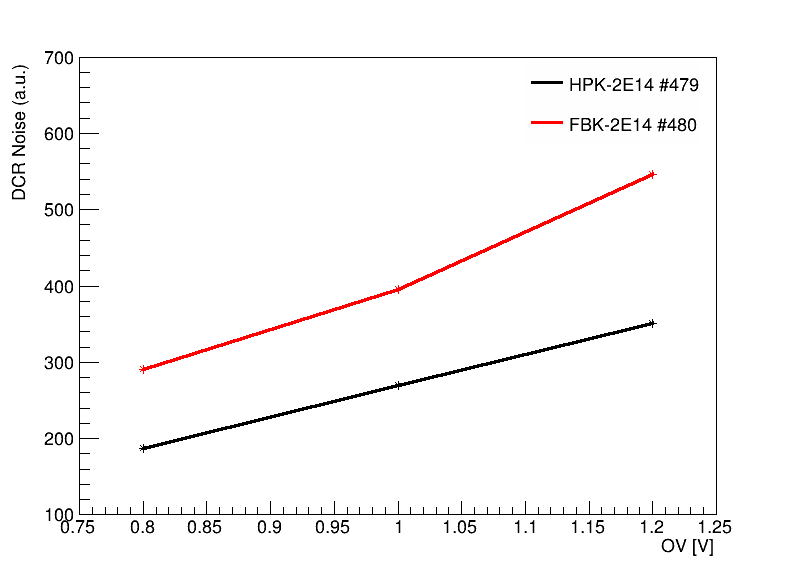

In [22]:
R.gStyle.SetOptTitle(0)
R.gStyle.SetOptStat(0)

l=R.TLegend(0.66,0.75,0.88,0.89)
l.SetTextSize(0.035)
l.SetFillColorAlpha(0,0)
l.SetBorderSize(0)

for par in ['scale','smear']:
    if (par=='scale'):
        a=R.TH2F('a','a',10,0.75,1.25,10,0.7,1.1)
        a.GetXaxis().SetTitle('OV [V]')
        a.GetYaxis().SetTitle('Rel LO')
    elif (par=='smear'):
        a=R.TH2F('a','a',10,0.75,1.25,10,100,700)
        a.GetXaxis().SetTitle('OV [V]')
        a.GetYaxis().SetTitle('DCR Noise (a.u.)')

    a.Draw()
    l.Clear()

    for i_ar,array in enumerate(fitData['array'].unique()):
    #    graphs[array][ch+'_scale'].SetMarkerStyle(24+i_ch)
    #    graphs[array][ch+'_scale'].SetMarkerSize(1.4)
        graphs[array]['mean_%s'%par].SetMarkerColor(i_ar+1)
        graphs[array]['mean_%s'%par].SetLineColor(i_ar+1)
        graphs[array]['mean_%s'%par].Draw('PLSAME')
        l.AddEntry(graphs[array]['mean_%s'%par],array.replace('_',' #'),'L')
    l.Draw()
    for ext in ['.png','.pdf']:
        c1.SaveAs('results/%s_mean%s'%(par,ext))
    c1.Draw()